Welcome to Pizza Time!


Created by: Chris Hanratty for Coursera Applied Data Science Capstone

The workflow begins by getting the 50 closest pizza places to downtown Milwaukie,OR. 
To do so, we will use Foursquare location data.

This dataset is used for the entire study. 
We start by importing the necessities and establishing our origin.

In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

address = 'Milwaukie, OR'

geolocator = Nominatim(user_agent="portland_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Portland are {}, {}.'.format(latitude, longitude))


CLIENT_ID = 'KDQANLA3BR0RE21TTKCA0PT32KZMN0AEZQFFG5ADOEYKHM4K' # Foursquare ID
CLIENT_SECRET = 'K2C4CKNWRJL3Z33D15G05QBVNJG0ZKVF01412FNDCSP3AGVT' # Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#define radius and limit the number of returns
#8050=5miles

radius=8050
LIMIT=100

#define the url when searcing for pizza near Milwaukie,OR
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=pizza'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

#get results from our query
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
pizza = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(pizza)
dataframe.head()


# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Pietro's Pizza,Pizza Place,10300 SE Main St,US,Milwaukie,United States,NaN,333,"[10300 SE Main St, Milwaukie, OR 97222, United...","[{'label': 'display', 'lat': 45.44805800488622...",45.448058,-122.641223,NaN,97222,OR,4b68ea00f964a520e2922be3
1,Pizza Schmizza,Pizza Place,9495 SE 82nd Ave,US,Portland,United States,at SE Overland St.,4772,"[9495 SE 82nd Ave (at SE Overland St.), Portla...","[{'label': 'display', 'lat': 45.45441667692032...",45.454417,-122.579547,NaN,97086,OR,4be31ea1d27a20a1b54a915b
2,Rudy's Gourmet Pizza,Pizza Place,2443 SE Powell Blvd,US,Portland,United States,NaN,5905,"[2443 SE Powell Blvd, Portland, OR 97202, Unit...","[{'label': 'display', 'lat': 45.49842873948562...",45.498429,-122.640874,NaN,97202,OR,4c5f86fe90b2c9b646043b22
3,Pizza Schmizza - Oak Grove,Pizza Place,14624 SE McLoughlin Blvd,US,Portland,United States,NaN,3177,"[14624 SE McLoughlin Blvd, Portland, OR 97267,...","[{'label': 'display', 'lat': 45.41728935645976...",45.417289,-122.632127,NaN,97267,OR,4c1a7879b9f876b0e3b67846
4,Bellagio's Pizza,Pizza Place,8112 SE 13th Ave,US,Portland,United States,13th & Tacoma St,2325,"[8112 SE 13th Ave (13th & Tacoma St), Portland...","[{'label': 'display', 'lat': 45.46407612101129...",45.464076,-122.652606,NaN,97202,OR,4bf9d461328d76b0a6ab14ec
5,California Pizza Kitchen,Pizza Place,"11840 S.E. 82nd Ave., Ste. 3060, Clackamas Tow...",US,Happy Valley,United States,at Clackamas Town Center,5109,"[11840 S.E. 82nd Ave., Ste. 3060, Clackamas To...","[{'label': 'display', 'lat': 45.434885, 'lng':...",45.434885,-122.575607,NaN,97086,OR,4ae0c9a6f964a520798221e3
6,Pizanos Pizza,Pizza Place,10843 SE Oak St,US,Milwaukie,United States,NaN,774,"[10843 SE Oak St, Milwaukie, OR 97222, United ...","[{'label': 'display', 'lat': 45.444264, 'lng':...",45.444264,-122.629505,NaN,97222,OR,4b7364bff964a52055ac2de3
7,BridgeCity Pizza,Pizza Place,5412 SE Woodstock Blvd,US,Portland,United States,Woodstock,4496,"[5412 SE Woodstock Blvd (Woodstock), Portland,...","[{'label': 'display', 'lat': 45.47890921210229...",45.478909,-122.607154,NaN,97206,OR,502b19f4e4b0ce5aaddc045b
8,HOTLIPS Pizza,Pizza Place,1909 SW 6th Ave,US,Portland,United States,at SW Hall St,8016,"[1909 SW 6th Ave (at SW Hall St), Portland, OR...","[{'label': 'display', 'lat': 45.51034548058568...",45.510345,-122.683637,NaN,97201,OR,4ac684cdf964a520cab420e3
9,Old Town Pizza & Brewing,Pizza Place,226 NW Davis St,US,Portland,United States,btwn NW 2nd & 3rd,9196,"[226 NW Davis St (btwn NW 2nd & 3rd), Portland...","[{'label': 'display', 'lat': 45.52454599648175...",45.524546,-122.673011,NaN,97209,OR,42829c80f964a5205a221fe3


Now that we have our base dataset. We can start adding more relevant information from other API calls like search, explore, etc.
Then once we have our complete dataset we can start exploring and visualizing to determine our best location for the new pizza shop.

Lets get the rating of the pizza places in our dataframe.

In [18]:
venue_id ='42829c80f964a5205a221fe3' # ID of Old Town Pizza & Brewing
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'description', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '42829c80f964a5205a221fe3',
 'name': 'Old Town Pizza & Brewing',
 'contact': {'phone': '5032229999',
  'formattedPhone': '(503) 222-9999',
  'twitter': 'oldtownpizzapdx'},
 'location': {'address': '226 NW Davis St',
  'crossStreet': 'btwn NW 2nd & 3rd',
  'lat': 45.52454599648175,
  'lng': -122.6730109264832,
  'labeledLatLngs': [{'label': 'display',
    'lat': 45.52454599648175,
    'lng': -122.6730109264832}],
  'postalCode': '97209',
  'cc': 'US',
  'city': 'Portland',
  'state': 'OR',
  'country': 'United States',
  'formattedAddress': ['226 NW Davis St (btwn NW 2nd & 3rd)',
   'Portland, OR 97209',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/old-town-pizza--brewing/42829c80f964a5205a221fe3',
 'categories': [{'id': '4bf58dd8d48988d1ca941735',
   'name': 'Pizza Place',
   'pluralName': 'Pizza Places',
   'shortName': 'Pizza',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
    'suffix': '.png'},
   'primary': True},
  {'id': '5

In [19]:
#get restauraunt rating
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.7


Sweet. Now we can start adding to the base dataset. Lets utilize what this course has taught and start working from .csv.

Lets do some exploratory analysis on our dataframe.

Lets start by installing the necessary items.

In [3]:
# install seaborn
!pip install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [4]:
import seaborn as sns
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

Next lets point to the file containing our cleaned data set.

Lets also have a look at it.

In [15]:
path = ('/resources/data/PizzaRatings.csv')
df_ratings=pd.read_csv(path)
df_ratings.head()

,Unnamed: 0,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,rating
0,0,Pietro's Pizza,Pizza Place,10300 SE Main St,US,Milwaukie,United States,NaN,333,"[10300 SE Main St, Milwaukie, OR 97222, United...","[{'label': 'display', 'lat': 45.44805800488622...",45.448058,-122.641223,NaN,97222.0,OR,4b68ea00f964a520e2922be3,7.4
1,1,Pizza Schmizza,Pizza Place,9495 SE 82nd Ave,US,Portland,United States,at SE Overland St.,4772,"[9495 SE 82nd Ave (at SE Overland St.), Portla...","[{'label': 'display', 'lat': 45.45441667692032...",45.454417,-122.579547,NaN,97086.0,OR,4be31ea1d27a20a1b54a915b,7.9
2,2,Rudy's Gourmet Pizza,Pizza Place,2443 SE Powell Blvd,US,Portland,United States,NaN,5905,"[2443 SE Powell Blvd, Portland, OR 97202, Unit...","[{'label': 'display', 'lat': 45.49842873948562...",45.498429,-122.640874,NaN,97202.0,OR,4c5f86fe90b2c9b646043b22,8.7
3,3,Bellagio's Pizza,Pizza Place,8112 SE 13th Ave,US,Portland,United States,13th & Tacoma St,2325,"[8112 SE 13th Ave (13th & Tacoma St), Portland...","[{'label': 'display', 'lat': 45.46407612101129...",45.464076,-122.652606,NaN,97202.0,OR,4bf9d461328d76b0a6ab14ec,5.7
4,4,Pizanos Pizza,Pizza Place,10843 SE Oak St,US,Milwaukie,United States,NaN,774,"[10843 SE Oak St, Milwaukie, OR 97222, United ...","[{'label': 'display', 'lat': 45.444264, 'lng':...",45.444264,-122.629505,NaN,97222.0,OR,4b7364bff964a52055ac2de3,NaN


Ok, got it. Now lows lets have a look at some simple statistics. In this case, we are interested
in the distance column and the rating column only.

In [6]:
df_ratings.describe()

,Unnamed: 0,distance,lat,lng,postalCode,rating
count,50.00000,50.000000,50.000000,50.000000,49.00000,33.000000
mean,24.50000,5355.000000,45.471938,-122.636877,97195.22449,6.900000
std,14.57738,2596.224677,0.037918,0.038932,67.01998,0.869626
min,0.00000,333.000000,45.400527,-122.757774,97015.00000,5.400000
25%,12.25000,3231.750000,45.444379,-122.661705,97202.00000,6.300000
50%,24.50000,5168.000000,45.468016,-122.633785,97214.00000,6.800000
75%,36.75000,7452.500000,45.508906,-122.615490,97222.00000,7.400000
max,49.00000,9606.000000,45.530640,-122.560705,97267.00000,9.000000


So we learned that on average most of the competition is at least 5 km away and that a Foursquare rating of 6.9 is an average rating.

Lets see if there is any correlation between distance in rating by doing some linear regression.
First install the necessities...

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


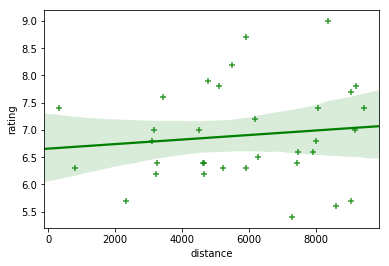

In [7]:
import seaborn as sns
ax = sns.regplot(x='distance', y='rating', data=df_ratings, color='green', marker='+')

Lets make this prettier :). 
First install the necessities...

In [18]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style



Ok, now lets have a look. 
Since Foursquare has a blue splashscreen lets give the markers a blue color.

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Does distance from Downtown Milwaukie have a linear relationship with Rating?')

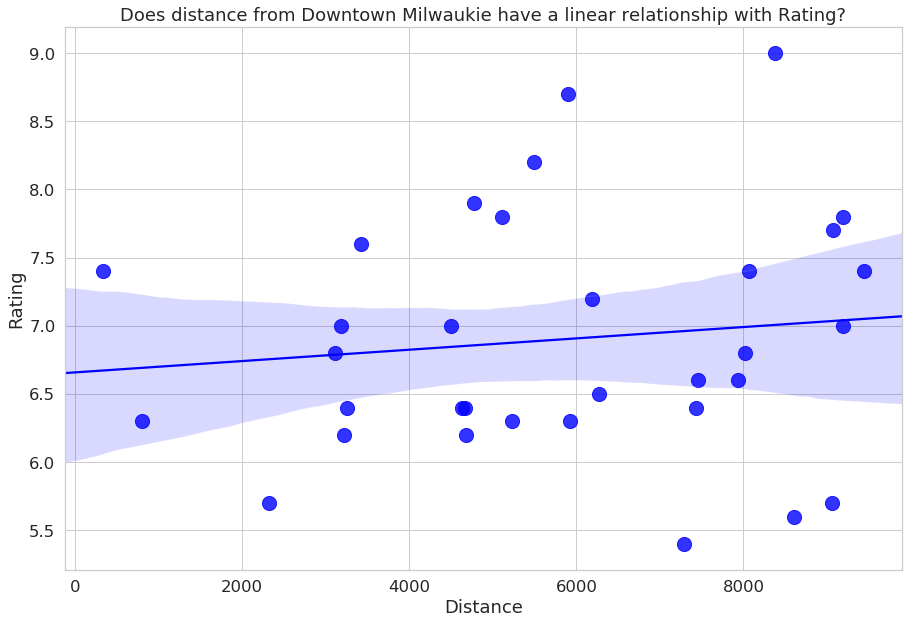

In [9]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='distance', y='rating', data=df_ratings, color='blue', marker='o', scatter_kws={'s': 200})
ax.set(xlabel='Distance', ylabel='Rating')
ax.set_title('Does distance from Downtown Milwaukie have a linear relationship with Rating?')

Alright, so no linear correlation between distance and rating. 
However, it could be argured that the highest rated restaurants are greater than 5 km away.
Pizza places witht the highest ratings are all further than 5 km from downtown Milwaukie...

For sake of this study, some painful manual work was performed to obtain information from Yelp on the same pizza places as the Foursquare API return.

Lets import that file and have a look, since it has been cleaned and prepared by yours truly :).

In [19]:
path = ('/resources/data/PizzaRatingswithYelp.csv')
df_compare=pd.read_csv(path)
df_compare.head()

,Unnamed: 0,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,...,lat,lng,neighborhood,postalCode,state,id,rating,yrr,yelprating,normalizeddifference
0,0,Pietro's Pizza,Pizza Place,10300 SE Main St,US,Milwaukie,United States,NaN,333,"[10300 SE Main St, Milwaukie, OR 97222, United...",...,45.448058,-122.641223,NaN,97222.0,OR,4b68ea00f964a520e2922be3,7.4,3.5,7.0,0.4
1,1,Pizza Schmizza,Pizza Place,9495 SE 82nd Ave,US,Portland,United States,at SE Overland St.,4772,"[9495 SE 82nd Ave (at SE Overland St.), Portla...",...,45.454417,-122.579547,NaN,97086.0,OR,4be31ea1d27a20a1b54a915b,7.9,3.5,7.0,0.9
2,2,Rudy's Gourmet Pizza,Pizza Place,2443 SE Powell Blvd,US,Portland,United States,NaN,5905,"[2443 SE Powell Blvd, Portland, OR 97202, Unit...",...,45.498429,-122.640874,NaN,97202.0,OR,4c5f86fe90b2c9b646043b22,8.7,NaN,NaN,NaN
3,3,Bellagio's Pizza,Pizza Place,8112 SE 13th Ave,US,Portland,United States,13th & Tacoma St,2325,"[8112 SE 13th Ave (13th & Tacoma St), Portland...",...,45.464076,-122.652606,NaN,97202.0,OR,4bf9d461328d76b0a6ab14ec,5.7,3.0,6.0,-0.3
4,4,Pizanos Pizza,Pizza Place,10843 SE Oak St,US,Milwaukie,United States,NaN,774,"[10843 SE Oak St, Milwaukie, OR 97222, United ...",...,45.444264,-122.629505,NaN,97222.0,OR,4b7364bff964a52055ac2de3,NaN,NaN,NaN,NaN


Let look at the new stats:

In [11]:
df_compare.describe()

,Unnamed: 0,distance,lat,lng,postalCode,rating,yrr,yelprating,normalizeddifference
count,50.00000,50.000000,50.000000,50.000000,49.00000,33.000000,33.000000,33.000000,30.000000
mean,24.50000,5355.000000,45.471938,-122.636877,97195.22449,6.900000,3.318182,6.636364,0.213333
std,14.57738,2596.224677,0.037918,0.038932,67.01998,0.869626,0.659287,1.318574,1.172599
min,0.00000,333.000000,45.400527,-122.757774,97015.00000,5.400000,1.500000,3.000000,-1.400000
25%,12.25000,3231.750000,45.444379,-122.661705,97202.00000,6.300000,3.000000,6.000000,-0.600000
50%,24.50000,5168.000000,45.468016,-122.633785,97214.00000,6.800000,3.500000,7.000000,0.000000
75%,36.75000,7452.500000,45.508906,-122.615490,97222.00000,7.400000,3.500000,7.000000,0.800000
max,49.00000,9606.000000,45.530640,-122.560705,97267.00000,9.000000,4.000000,8.000000,3.400000


Interestingly, by looking at the Foursquare rating (rating) and the Yelp Rating (yelprating) means, you can see that Foursquare users tend to rate a bit higher than Yelp users.

Lets see if there is any linear correlation between distance and Yelprating, like we did for the Foursquare data:

Text(0.5, 1.0, 'Does distance from Downtown Milwaukie have a linear relationship with YelpRating?')

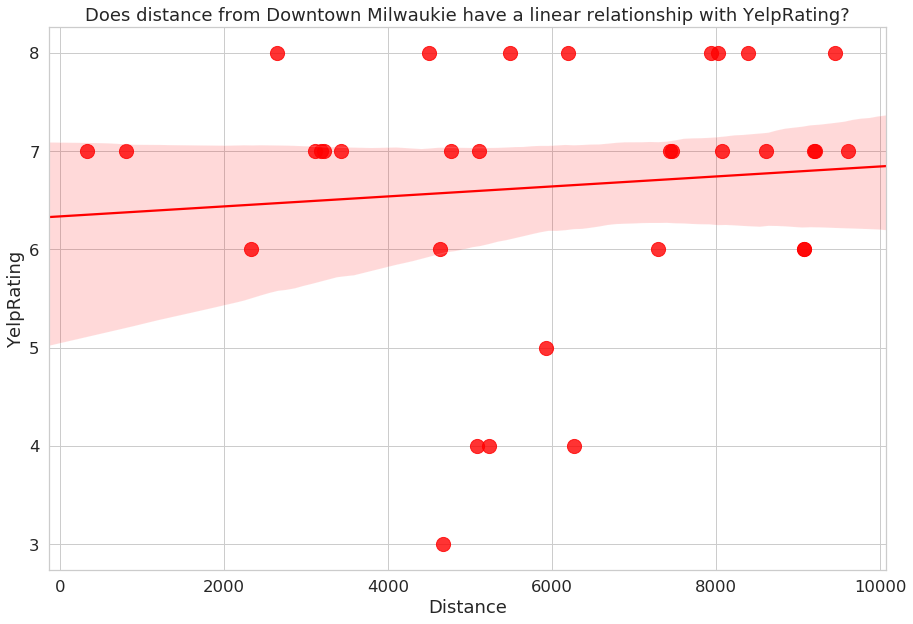

In [19]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='distance', y='yelprating', data=df_compare, color='red', marker='o', scatter_kws={'s': 200})
ax.set(xlabel='Distance', ylabel='YelpRating')
ax.set_title('Does distance from Downtown Milwaukie have a linear relationship with YelpRating?')

No statistical linear correlation again, although this dataset is different in that there appears to be higher rated pizza places closer to downtown Milwaukie.

Now that we have our datset complete, lets see what our results look like on a map!

First, we need to install the necessities, as always.
We also need to establish the origin of our study as downtown Milwaukie,OR.

Lets have a look at our basemap

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

address = 'Milwaukie, OR'

geolocator = Nominatim(user_agent="portland_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Portland are {}, {}.'.format(latitude, longitude))


CLIENT_ID = 'KDQANLA3BR0RE21TTKCA0PT32KZMN0AEZQFFG5ADOEYKHM4K' #  Foursquare ID
CLIENT_SECRET = 'K2C4CKNWRJL3Z33D15G05QBVNJG0ZKVF01412FNDCSP3AGVT' #  Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# create map of Milwaukie using latitude and longitude values
map_Milwaukie = folium.Map(location=[latitude, longitude], zoom_start=10)

map_Milwaukie

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.9                |           py36_0         896 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_1         4.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0

The follow

Lets load our nicely prepared dataset so we can build some vizzes!

In [3]:
path = ('/resources/data/PizzaRatings.csv')
df_ratings=pd.read_csv(path)
df_ratings

,Unnamed: 0,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,rating
0,0,Pietro's Pizza,Pizza Place,10300 SE Main St,US,Milwaukie,United States,NaN,333,"[10300 SE Main St, Milwaukie, OR 97222, United...","[{'label': 'display', 'lat': 45.44805800488622...",45.448058,-122.641223,NaN,97222.0,OR,4b68ea00f964a520e2922be3,7.4
1,1,Pizza Schmizza,Pizza Place,9495 SE 82nd Ave,US,Portland,United States,at SE Overland St.,4772,"[9495 SE 82nd Ave (at SE Overland St.), Portla...","[{'label': 'display', 'lat': 45.45441667692032...",45.454417,-122.579547,NaN,97086.0,OR,4be31ea1d27a20a1b54a915b,7.9
2,2,Rudy's Gourmet Pizza,Pizza Place,2443 SE Powell Blvd,US,Portland,United States,NaN,5905,"[2443 SE Powell Blvd, Portland, OR 97202, Unit...","[{'label': 'display', 'lat': 45.49842873948562...",45.498429,-122.640874,NaN,97202.0,OR,4c5f86fe90b2c9b646043b22,8.7
3,3,Bellagio's Pizza,Pizza Place,8112 SE 13th Ave,US,Portland,United States,13th & Tacoma St,2325,"[8112 SE 13th Ave (13th & Tacoma St), Portland...","[{'label': 'display', 'lat': 45.46407612101129...",45.464076,-122.652606,NaN,97202.0,OR,4bf9d461328d76b0a6ab14ec,5.7
4,4,Pizanos Pizza,Pizza Place,10843 SE Oak St,US,Milwaukie,United States,NaN,774,"[10843 SE Oak St, Milwaukie, OR 97222, United ...","[{'label': 'display', 'lat': 45.444264, 'lng':...",45.444264,-122.629505,NaN,97222.0,OR,4b7364bff964a52055ac2de3,NaN
5,5,Pizza Schmizza - Oak Grove,Pizza Place,14624 SE McLoughlin Blvd,US,Portland,United States,NaN,3177,"[14624 SE McLoughlin Blvd, Portland, OR 97267,...","[{'label': 'display', 'lat': 45.41728935645976...",45.417289,-122.632127,NaN,97267.0,OR,4c1a7879b9f876b0e3b67846,7.0
6,6,BridgeCity Pizza,Pizza Place,5412 SE Woodstock Blvd,US,Portland,United States,Woodstock,4496,"[5412 SE Woodstock Blvd (Woodstock), Portland,...","[{'label': 'display', 'lat': 45.47890921210229...",45.478909,-122.607154,NaN,97206.0,OR,502b19f4e4b0ce5aaddc045b,7.0
7,7,Dominos Pizza,Pizza Place,10586 SE 32nd Ave,US,Milwaukie,United States,harrison,805,"[10586 SE 32nd Ave (harrison), Milwaukie, OR 9...","[{'label': 'display', 'lat': 45.44687716075441...",45.446877,-122.629193,NaN,97222.0,OR,4bcf7c6f046076b0ce696e71,6.3
8,8,Sweet Heart Pizza,Pizza Place,0672 SW Gaines Street,US,Portland,United States,NaN,6189,"[0672 SW Gaines Street, Portland, OR 97239, Un...","[{'label': 'display', 'lat': 45.496273, 'lng':...",45.496273,-122.671250,NaN,97239.0,OR,58b2665372714f3fd6faebc2,7.2
9,9,Domino's Pizza,Pizza Place,14621 SE McLoughlin Blvd,US,Oak Grove,United States,NaN,3223,"[14621 SE McLoughlin Blvd, Oak Grove, OR 97267...","[{'label': 'display', 'lat': 45.416739, 'lng':...",45.416739,-122.633265,NaN,97267.0,OR,4c563f15744a0f479978c6cb,6.2


Lets make a map of pizza places close to downton Milwaukie,OR:

Lets also be sure to highlight our origin, downtown Milwaukie.

In [5]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around downtown Milwaukie



venues_map = folium.Map(location=[latitude, longitude], zoom_start=12, tiles = 'Stamen Terrain') # generate map centred around downtown Milwaukie

# add a red circle marker to represent downtown Milwaukie
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Downtown Milwaukie',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

#add label text for popul



# add the Pizza restaurants as blue circle markers
for lat, lng, label in zip(df_ratings.lat, df_ratings.lng, df_ratings.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map


That is nice, but lets make it cluster and uncluster based on zoom level so the map doesnt look so congested.

In [6]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
new_map = folium.Map(location = [latitude, longitude], zoom_start = 12, tiles = 'Stamen Terrain')

# add a red circle marker to represent downtown Milwaukie
folium.features.CircleMarker(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='Downtown Milwaukie',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.2
).add_to(new_map)


# instantiate a mark cluster object for pizza clusters in the dataframe
pizzacluster = plugins.MarkerCluster().add_to(new_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_ratings.lat, df_ratings.lng, df_ratings.categories):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(pizzacluster)


#display map  
new_map

Awesome!! Now we have all of our data, did some analysis and visualized it on a map!

I hope you enjoyed this workbook.